(60000, 784)
(10000, 784)
1.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 64)       

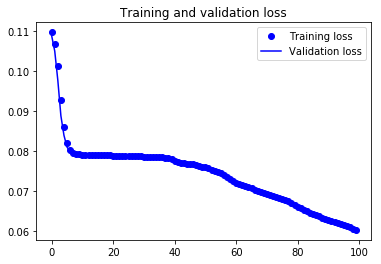

In [13]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical


from keras.datasets import mnist



(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

batch_size = 64
epochs = 100
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
num_classes = 10



X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

print(np.max(X_train))
train_X,valid_X,train_ground,valid_ground = train_test_split(X_train,
                                                             X_train,
                                                             test_size=0.2,
                                                             random_state=13)


input_img = Input(shape = (784,))
num_classes = 10

def Encoder_part(input_img):

    encoded = Dense(units=512, activation='relu')(input_img)
    encoded = Dense(units=256, activation='relu')(encoded)
    encoded = Dense(units=128, activation='relu')(encoded)
    encoded = Dense(units=64, activation='relu')(encoded)
    encoded = Dense(units=32, activation='relu')(encoded)

    return encoded

def Decoder_part(encoded):
        
    decoded = Dense(units=64, activation='relu')(encoded)
    decoded = Dense(units=128, activation='relu')(decoded)
    decoded = Dense(units=256, activation='relu')(decoded)
    decoded = Dense(units=512, activation='relu')(decoded)
    decoded = Dense(units=784, activation='relu')(decoded)
    
    return decoded

autoencoder=Model(input_img, Decoder_part(Encoder_part(input_img)))
encoder = Model(input_img, Encoder_part(input_img))

autoencoder.summary()
autoencoder.compile(loss='mean_squared_error', optimizer = SGD())
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [0]:
autoencoder.save_weights('autoencoder.h5')


In [15]:
x = autoencoder.get_weights()
print(x)

[array([[ 0.03350227,  0.00016259, -0.02356673, ...,  0.00656453,
        -0.00766421, -0.03494211],
       [ 0.0318645 ,  0.0527316 ,  0.03770525, ..., -0.05685012,
        -0.02925427,  0.00482358],
       [-0.05640195, -0.04725786, -0.06469319, ...,  0.01920749,
        -0.00984577,  0.0673181 ],
       ...,
       [ 0.06290324, -0.01622011, -0.0473644 , ...,  0.02892659,
         0.05494661,  0.05042632],
       [ 0.06586893,  0.02990739,  0.03405216, ..., -0.05684577,
         0.00795543, -0.05303086],
       [ 0.03625268,  0.05137736,  0.04305439, ...,  0.02585419,
         0.06436005,  0.00731985]], dtype=float32), array([ 4.47302265e-03,  1.28835719e-03, -1.80166925e-03,  2.72304332e-03,
       -1.65230688e-03, -2.00682436e-03,  3.40737891e-03, -2.66391062e-03,
        5.67648443e-04, -1.71647465e-03, -5.11462335e-04,  3.16248299e-03,
        1.40971318e-03,  2.45015137e-03,  3.26806726e-03, -4.74247383e-04,
        1.96608738e-03, -3.47376917e-04,  1.04789361e-02,  1.81900559e

In [16]:
(_ , y_train), (_, y_test) = mnist.load_data()
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
train_X,valid_X,y_train,y_valid = train_test_split(X_train,train_Y_one_hot,test_size=0.2,random_state=13)

In [36]:
train_X.shape,valid_X.shape,y_train.shape,y_valid.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

In [0]:
def fc(enco):
    flat = enco
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out

In [0]:
full_model = Model(input_img,fc(Encoder_part(input_img)))

In [0]:
for l1,l2 in zip(full_model.layers[:6],autoencoder.layers[0:6]):
    l1.set_weights(l2.get_weights())

In [29]:
autoencoder.get_weights()[0][1]

array([ 0.0318645 ,  0.0527316 ,  0.03770525, -0.05542033, -0.05820984,
       -0.00544736, -0.01592311,  0.05352017, -0.01420155,  0.04073779,
        0.02344251, -0.03550166,  0.01747581, -0.01545013, -0.0489783 ,
        0.01483842,  0.0168912 , -0.05057989,  0.0312857 , -0.04849799,
       -0.05985792, -0.04368106, -0.06081789,  0.03584783, -0.04070997,
       -0.01626016, -0.01008868,  0.03130446, -0.03110995,  0.06558681,
        0.02118193,  0.06730373,  0.05833305, -0.04881758, -0.0616199 ,
        0.02888887,  0.04810737,  0.02983052, -0.01881532,  0.0653441 ,
       -0.02696414, -0.02149675,  0.03288609,  0.00258742, -0.01643706,
       -0.01174334, -0.05097757,  0.05983111, -0.04257439, -0.01277469,
       -0.02902209,  0.01246917,  0.0527867 ,  0.06414768,  0.03164954,
       -0.03368617, -0.05238208, -0.05891965,  0.02202191, -0.01154877,
        0.04529169, -0.00092404,  0.01062354,  0.04258962, -0.02360821,
       -0.04039759,  0.05843349,  0.02980365, -0.0127855 ,  0.02

In [30]:
full_model.get_weights()[0][1]


array([ 0.0318645 ,  0.0527316 ,  0.03770525, -0.05542033, -0.05820984,
       -0.00544736, -0.01592311,  0.05352017, -0.01420155,  0.04073779,
        0.02344251, -0.03550166,  0.01747581, -0.01545013, -0.0489783 ,
        0.01483842,  0.0168912 , -0.05057989,  0.0312857 , -0.04849799,
       -0.05985792, -0.04368106, -0.06081789,  0.03584783, -0.04070997,
       -0.01626016, -0.01008868,  0.03130446, -0.03110995,  0.06558681,
        0.02118193,  0.06730373,  0.05833305, -0.04881758, -0.0616199 ,
        0.02888887,  0.04810737,  0.02983052, -0.01881532,  0.0653441 ,
       -0.02696414, -0.02149675,  0.03288609,  0.00258742, -0.01643706,
       -0.01174334, -0.05097757,  0.05983111, -0.04257439, -0.01277469,
       -0.02902209,  0.01246917,  0.0527867 ,  0.06414768,  0.03164954,
       -0.03368617, -0.05238208, -0.05891965,  0.02202191, -0.01154877,
        0.04529169, -0.00092404,  0.01062354,  0.04258962, -0.02360821,
       -0.04039759,  0.05843349,  0.02980365, -0.0127855 ,  0.02

In [0]:
for layer in full_model.layers[0:6]:
    layer.trainable = False

In [0]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [33]:
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_53 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_54 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_56 (Dense)             (None, 128)               4224      
__________

In [0]:
for layer in full_model.layers[0:19]:
    layer.trainable = False

In [42]:
classify_train = full_model.fit(train_X, y_train, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 2752/48000 [>.............................] - ETA: 2s - loss: 0.3377 - acc: 0.8953

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


48000/48000 [==============================] - 3s 56us/step - loss: 0.3376 - acc: 0.8896 - val_loss: 0.3616 - val_acc: 0.8845
Epoch 2/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.3397 - acc: 0.8888 - val_loss: 0.3822 - val_acc: 0.8775
Epoch 3/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.3398 - acc: 0.8891 - val_loss: 0.3901 - val_acc: 0.8734
Epoch 4/100
48000/48000 [==============================] - 3s 52us/step - loss: 0.3367 - acc: 0.8912 - val_loss: 0.3650 - val_acc: 0.8827
Epoch 5/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.3369 - acc: 0.8892 - val_loss: 0.3663 - val_acc: 0.8838
Epoch 6/100
48000/48000 [==============================] - 3s 52us/step - loss: 0.3358 - acc: 0.8913 - val_loss: 0.3576 - val_acc: 0.8860
Epoch 7/100
48000/48000 [==============================] - 3s 52us/step - loss: 0.3355 - acc: 0.8892 - val_loss: 0.3748 - val_acc: 0.8791
Epoch 8/100
48000/48000 [=====================

In [0]:
full_model.save_weights('autoencoder_classification.h5')


In [0]:
for layer in full_model.layers[0:19]:
    layer.trainable = True

In [0]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [47]:
classify_train = full_model.fit(train_X, y_train, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 92us/step - loss: 0.2855 - acc: 0.9203 - val_loss: 0.1692 - val_acc: 0.9547
Epoch 2/100
48000/48000 [==============================] - 4s 76us/step - loss: 0.1365 - acc: 0.9590 - val_loss: 0.1512 - val_acc: 0.9571
Epoch 3/100
48000/48000 [==============================] - 4s 76us/step - loss: 0.0998 - acc: 0.9699 - val_loss: 0.1413 - val_acc: 0.9604
Epoch 4/100
48000/48000 [==============================] - 4s 76us/step - loss: 0.0790 - acc: 0.9760 - val_loss: 0.1304 - val_acc: 0.9653
Epoch 5/100
48000/48000 [==============================] - 4s 75us/step - loss: 0.0680 - acc: 0.9789 - val_loss: 0.1237 - val_acc: 0.9668
Epoch 6/100
48000/48000 [==============================] - 4s 77us/step - loss: 0.0579 - acc: 0.9823 - val_loss: 0.1094 - val_acc: 0.9716
Epoch 7/100
48000/48000 [==============================] - 4s 76us/step - loss: 0.0518 - acc: 0.9845 - val_loss: 0.1112 - 

In [0]:
full_model.save_weights('classification_complete.h5')

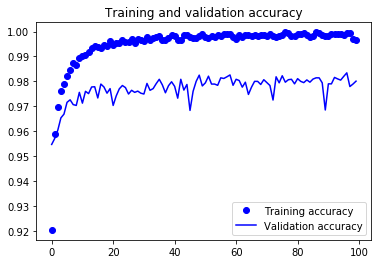

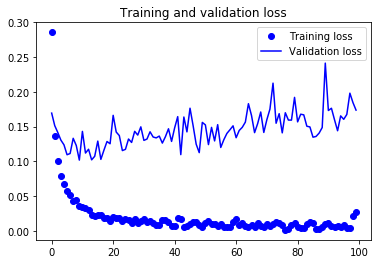

In [49]:
accuracy = classify_train.history['acc']
val_accuracy = classify_train.history['val_acc']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [53]:
test_eval = full_model.evaluate(X_test, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.1763450436281786
Test accuracy: 0.9801
